# Chapter 3: Symbolic computing

导入sympy符号计算库

In [25]:
import sympy

In [26]:
sympy.init_printing()

In [27]:
from sympy import pi,I

定义变量

In [28]:
x = sympy.Symbol("x") #此时x是一个抽象的数学符号，可以表示一个实数，整数，复数等

In [29]:
y = sympy.Symbol("y", real=True) #如果有必要给变量定义具体类型，可在符号创建时添加关键字参数

In [35]:
y.is_real #用real=True参数

True

In [36]:
x.is_real is None #使用is_real来查询之前定义的符号x，它没有显式地指定为real，因此可以同时表示实数和非实数变量

True

In [37]:
sympy.Symbol("z", imaginary=True).is_real #定义z为一个虚数，判断z是否是一个实数

False

如果在计算中对符号一无所知，则无法进行简化。y定义为一个正数，因此可以简化。

In [38]:
x = sympy.Symbol("x")

In [39]:
y = sympy.Symbol("y", positive=True)

In [40]:
sympy.sqrt(x ** 2)

In [41]:
sympy.sqrt(y ** 2)

n2定义为一个整数，n3定义为一个奇数

In [42]:
n1, n2, n3 = sympy.Symbol("n"), sympy.Symbol("n", integer=True), sympy.Symbol("n", odd=True)

In [43]:
sympy.cos(n1 * pi)

In [49]:
sympy.cos(n2 * pi)

In [45]:
sympy.cos(n3 * pi)

sympy.symbols 定义多个变量

In [46]:
a, b, c = sympy.symbols("a, b, c", negative=True)

In [47]:
d, e, f = sympy.symbols("d, e, f", positive=True)

## Numbers

设置数字类型

In [48]:
i = sympy.Integer(19)

In [50]:
"i = {} [type {}]".format(i, type(i))

"i = 19 [type <class 'sympy.core.numbers.Integer'>]"

In [51]:
i.is_Integer, i.is_real, i.is_odd

(True, True, True)

In [52]:
f = sympy.Float(2.3)

In [53]:
"f = {} [type {}]".format(f, type(f))

"f = 2.30000000000000 [type <class 'sympy.core.numbers.Float'>]"

In [54]:
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

In [55]:
i, f = sympy.sympify(19), sympy.sympify(2.3)

In [56]:
type(i)

sympy.core.numbers.Integer

In [57]:
type(f)

sympy.core.numbers.Float

integer=True的符号表示某个整数，而integer实例表示一个特定的整数。
对于这两种情况，is_integer属性都是True，但也有一个属性is_Integer（注意大写的I），它只对整数实例有效。

In [58]:
n = sympy.Symbol("n", integer=True)

In [59]:
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [60]:
i = sympy.Integer(19)

In [61]:
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

In [62]:
i ** 50 #19的50次方

In [63]:
sympy.factorial(100) #100的阶乘

In [64]:
"%.25f" % 0.3  # create a string represention with 25 decimals

'0.2999999999999999888977698'

In [65]:
sympy.Float(0.3, 25) #表示浮点数的字符串，实数0.3不能精确表示为正常的固定位大小浮点数，当打印0.3的25个有效数字时，它显示为0.299999999999888977698

In [66]:
sympy.Float('0.3', 25) #Float对象的精度（有效小数位数）

### Rationals

In [67]:
sympy.Rational(11, 13)

In [68]:
r1 = sympy.Rational(2, 3)

In [73]:
r2 = sympy.Rational(4, 5)

In [74]:
r1 * r2

In [75]:
r1 / r2

### Functions

创建了一个未定义的函数f，它应用于符号x，另一个函数g，应用于符号x，y，z

In [83]:
x, y, z = sympy.symbols("x, y, z")

In [84]:
f = sympy.Function("f")

In [85]:
type(f)

sympy.core.function.UndefinedFunction

In [86]:
f(x)

In [87]:
g = sympy.Function("g")(x, y, z)

In [88]:
g

In [89]:
g.free_symbols  #free_symbols属性，返回给定表达式中包含的一组唯一符号，以证明应用的函数确实与一组特定的输入符号相关联。

定义函数是具有特定实现的函数，可以对所有有效输入参数进行数值计算

In [90]:
sympy.sin #表示可应用于数值、符号或表达式的未赋值sin函数

sin

In [91]:
sympy.sin(x)

In [92]:
sympy.sin(pi * 1.5)

In [93]:
n = sympy.Symbol("n", integer=True) #当应用于符号时，sin函数将保持未赋值状态，但在可能的情况下，它将被计算为数值

In [95]:
sympy.sin(pi * n)

SymPy中的第三种类型的函数是lambda函数，或匿名函数，它们没有与其相关联的名称，但有一个可以计算的特定函数体。

In [97]:
h = sympy.Lambda(x, x**2)

In [98]:
h

In [99]:
h(5)

In [100]:
h(1+x)

### Expressions

在SymPy中，数学表达式用树表示，其中叶子是符号，节点是表示数学运算的类实例。这些类的例子包括基本算术运算符的Add、Mul和Pow，以及用于分析数学运算的和、积、积分和导数。

In [101]:
x = sympy.Symbol("x")

In [102]:
e = 1 + 2 * x**2 + 3 * x**3

In [103]:
e

In [104]:
e.args

In [105]:
e.args[1]

In [106]:
e.args[1].args[1]

In [107]:
e.args[1].args[1].args[0]

In [108]:
e.args[1].args[1].args[0].args

## Simplification

SymPy表达式视为不可变对象，表达式经过简化和重写返回新的表达式树，而不是就地修改表达式。

In [109]:
expr = 2 * (x**2 - x) - x * (x + 1)

In [110]:
expr

In [111]:
sympy.simplify(expr) #simplify函数简化表达式

In [112]:
expr.simplify()

In [113]:
expr

In [114]:
expr = 2 * sympy.cos(x) * sympy.sin(x)

In [115]:
expr

In [116]:
sympy.trigsimp(expr) #trigsimp简化三角函数

In [117]:
expr = sympy.exp(x) * sympy.exp(y)

In [118]:
expr

In [119]:
sympy.powsimp(expr) #powsimp简化幂函数

## Expand

In [120]:
expr = (x + 1) * (x + 2)

In [121]:
sympy.expand(expr)

In [122]:
sympy.sin(x + y).expand(trig=True) #trig=True用于三角函数展开

In [123]:
a, b = sympy.symbols("a, b", positive=True)

In [124]:
sympy.log(a * b).expand(log=True) #log=True用于对数展开

In [125]:
sympy.exp(I*a + b).expand(complex=True) #complex=True用于分隔表达式的实部和虚部

In [126]:
sympy.expand((a * b)**x, power_exp=True) #power_exp=True用于幂函数展开

In [127]:
sympy.exp(I*(a-b)*x).expand(power_exp=True)

## Factor

sympy.expand 展开函数是一个表达式，sympy.factor 使表达式尽可能因子话，效果与sympy.expand 相似

In [128]:
sympy.factor(x**2 - 1)

In [129]:
sympy.factor(x * sympy.cos(y) + sympy.sin(z) * x)

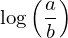

In [130]:
sympy.logcombine(sympy.log(a) - sympy.log(b)) # 与上面展开类型相似的逆运算可以用sympy.trigsimp, sympy.powsimp和sympy.logcombine

在处理数学表达式时，通常需要对因子分解进行细粒度控制。

In [131]:
expr = x + y + x * y * z 

In [132]:
expr.factor()

In [90]:
expr.collect(x) #x+y+xyz不能完全分解，可以部分分解包含x或y的项

In [91]:
expr.collect(y)

In [92]:
expr = sympy.cos(x + y) + sympy.sin(x - y) 

In [93]:
expr.expand(trig=True).collect([sympy.cos(x), sympy.sin(x)]).collect(sympy.cos(y) - sympy.sin(y)) #可以多个collect连接

Together, apart, cancel

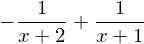

In [94]:
sympy.apart(1/(x**2 + 3*x + 2), x) #sympy.apart表示写成部分分数

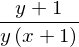

In [95]:
sympy.together(1 / (y * x + y) + 1 / (1+x)) #sympy.together表示合并成单个分数

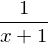

In [96]:
sympy.cancel(y / (y * x + y)) #sympy.cancel消掉分子和分母的共同因子

Substitutions

变量替换

In [97]:
(x + y).subs(x, y) #subs(x, y)把x换成y

In [98]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

In [99]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos}) #多个替换时，用字典映射的方式

subs方法的一个典型应用是用数值代替符号进行数值计算

In [100]:
expr = x * y + z**2 *x 

In [101]:
values = {x: 1.25, y: 0.4, z: 3.2}

In [102]:
expr.subs(values)

## Numerical evaluation

In [103]:
sympy.N(1 + pi)

In [104]:
sympy.N(pi, 50)

In [105]:
(x + 1/pi).evalf(7)

In [106]:
expr = sympy.sin(pi * x * sympy.exp(x))

In [107]:
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]

In [108]:
expr_func = sympy.lambdify(x, expr)

In [109]:
expr_func(1.0)

In [110]:
expr_func = sympy.lambdify(x, expr, 'numpy')

In [111]:
import numpy as np

In [112]:
xvalues = np.arange(0, 10)

In [113]:
expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

## Calculus

In [114]:
f = sympy.Function('f')(x)

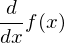

In [115]:
sympy.diff(f, x)

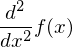

In [116]:
sympy.diff(f, x, x)

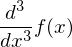

In [117]:
sympy.diff(f, x, 3)

In [118]:
g = sympy.Function('g')(x, y)

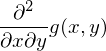

In [119]:
g.diff(x, y)

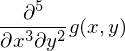

In [120]:
g.diff(x, 3, y, 2)         # equivalent to s.diff(g, x, x, x, y, y)

In [121]:
expr = x**4 + x**3 + x**2 + x + 1

In [122]:
expr.diff(x)

In [123]:
expr.diff(x, x)

In [124]:
expr = (x + 1)**3 * y ** 2 * (z - 1)

In [125]:
expr.diff(x, y, z)

In [126]:
expr = sympy.sin(x * y) * sympy.cos(x / 2)

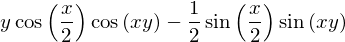

In [127]:
expr.diff(x)

In [128]:
expr = sympy.special.polynomials.hermite(x, 0)

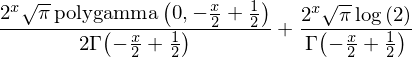

In [129]:
expr.diff(x).doit()

In [130]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)

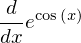

In [131]:
d

In [132]:
d.doit()

## Integrals

In [133]:
a, b = sympy.symbols("a, b")
x, y = sympy.symbols('x, y')
f = sympy.Function('f')(x)

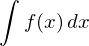

In [134]:
sympy.integrate(f)

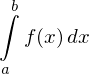

In [135]:
sympy.integrate(f, (x, a, b))

In [136]:
sympy.integrate(sympy.sin(x))

In [137]:
sympy.integrate(sympy.sin(x), (x, a, b))

In [138]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

In [139]:
a, b, c = sympy.symbols("a, b, c", positive=True)

In [140]:
sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -oo, oo))

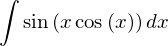

In [141]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

In [142]:
expr = sympy.sin(x*sympy.exp(y))

In [143]:
sympy.integrate(expr, x)

In [144]:
expr = (x + y)**2

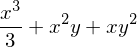

In [145]:
sympy.integrate(expr, x)

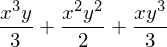

In [146]:
sympy.integrate(expr, x, y)

In [147]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

## Series

In [148]:
x = sympy.Symbol("x")

In [149]:
f = sympy.Function("f")(x)

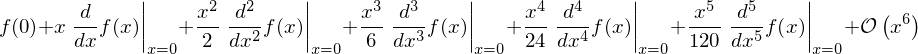

In [150]:
sympy.series(f, x)

In [151]:
x0 = sympy.Symbol("{x_0}")

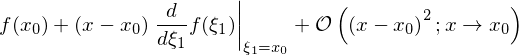

In [152]:
f.series(x, x0, n=2)

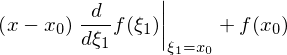

In [153]:
f.series(x, x0, n=2).removeO()

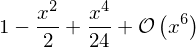

In [154]:
sympy.cos(x).series()

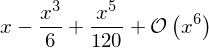

In [155]:
sympy.sin(x).series()

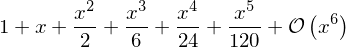

In [156]:
sympy.exp(x).series()

In [157]:
(1/(1+x)).series()

In [158]:
expr = sympy.cos(x) / (1 + sympy.sin(x * y))

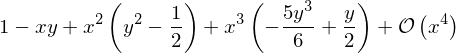

In [159]:
expr.series(x, n=4)

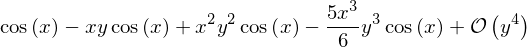

In [160]:
expr.series(y, n=4)

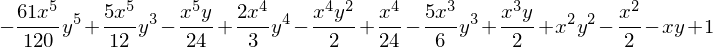

In [161]:
expr.series(y).removeO().series(x).removeO().expand()

## Limits

In [162]:
sympy.limit(sympy.sin(x) / x, x, 0)

In [163]:
f = sympy.Function('f')
x, h = sympy.symbols("x, h")

In [164]:
diff_limit = (f(x + h) - f(x))/h

In [165]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

In [166]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

In [167]:
expr = (x**2 - 3*x) / (2*x - 2)

In [168]:
p = sympy.limit(expr/x, x, oo)

In [169]:
q = sympy.limit(expr - p*x, x, oo)

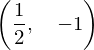

In [170]:
p, q

## Sums and products

In [171]:
n = sympy.symbols("n", integer=True)

In [172]:
x = sympy.Sum(1/(n**2), (n, 1, oo))

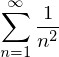

In [173]:
x

In [174]:
x.doit()

In [175]:
x = sympy.Product(n, (n, 1, 7))

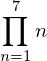

In [176]:
x

In [177]:
x.doit()

In [178]:
x = sympy.Symbol("x")

In [179]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()

## Equations

In [180]:
x = sympy.symbols("x")

In [181]:
sympy.solve(x**2 + 2*x - 3)

In [182]:
a, b, c = sympy.symbols("a, b, c")

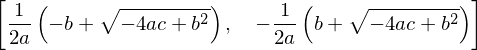

In [183]:
sympy.solve(a * x**2 + b * x + c, x)

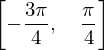

In [184]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

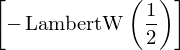

In [185]:
sympy.solve(sympy.exp(x) + 2 * x, x)

In [186]:
sympy.solve(x**5 - x**2 + 1, x)

In [187]:
1 #s.solve(s.tan(x) - x, x)

In [188]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1

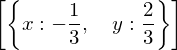

In [189]:
sympy.solve([eq1, eq2], [x, y], dict=True)

In [190]:
eq1 = x**2 - y
eq2 = y**2 - x

In [191]:
sols = sympy.solve([eq1, eq2], [x, y], dict=True)

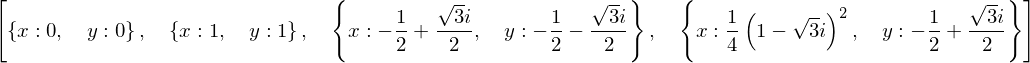

In [192]:
sols

In [193]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 for sol in sols]

[True, True, True, True]

## Linear algebra

In [194]:
sympy.Matrix([1,2])

In [195]:
sympy.Matrix([[1,2]])

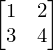

In [196]:
sympy.Matrix([[1, 2], [3, 4]])

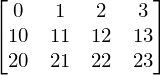

In [197]:
sympy.Matrix(3, 4, lambda m,n: 10 * m + n)

In [198]:
a, b, c, d = sympy.symbols("a, b, c, d")

In [199]:
M = sympy.Matrix([[a, b], [c, d]])

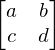

In [200]:
M

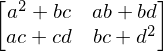

In [201]:
M * M

In [202]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))

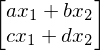

In [203]:
M * x

In [204]:
p, q = sympy.symbols("p, q")

In [205]:
M = sympy.Matrix([[1, p], [q, 1]])

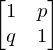

In [206]:
M

In [207]:
b = sympy.Matrix(sympy.symbols("b_1, b_2"))

In [208]:
b

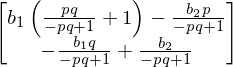

In [209]:
x = M.solve(b)
x

In [210]:
x = M.LUsolve(b)

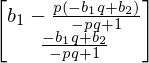

In [211]:
x

In [212]:
x = M.inv() * b

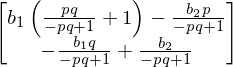

In [213]:
x

## Versions

In [1]:
%reload_ext version_information
%version_information sympy, numpy

Software,Version
Python,3.4.3 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython,3.2.0
OS,Darwin 14.5.0 x86_64 i386 64bit
sympy,0.7.6
numpy,1.9.2
